## Data Preparation: Export, Clean and Transform data
*Analyst:* José Eduardo Téllez


### Objetive
This notebook aims to prepare data for next analysis by cleaning, and transforming the data. 
The source file, `'data_science_test_data.xlsx'`, was provided by the HR team,
and it contains the raw data that will be processed to ensure quality and consistency.


 ### Functions:

Any function used here would be saved at lib folder.

### RESULTS

The resulting data has the next variables and is saved in cache folder as  'prep_data.csv'
* ggsearch:  Google spending
* facebook:  Facebook spending
* display:  Display spending
* promotion:  Promotions (0,1) 
* day:  Day of the week
* month:  Month
* leads_n:  Number of leads in that date
* days_considered:  Number of days to be Qualified. 
* considered_leads_n:  Number of leads Qualified
* days_purchase:  Days taken to complete a purchase.
* purchase_leads:  Number of leads that completed a purchase THE DATE OF THE PURCHASE.
* time_to_purchase:  Time taken from lead TO PURCHASE THE DATE OF BEEN IDENTIFEID AS LEAD.
* purchase_leads_fur:  number of leads that completed a purchase THE DATE OF BEEN IDENTIFIED AS LEAD.






## 1. Import packages
In this section, we import the necessary libraries

In [34]:
import pandas as pd
import os 
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Define Path
In this section, we defined the path that would be used. 

In [35]:
main_path = os.path.dirname(os.path.abspath(os.getcwd()))

In [36]:
sys.path.append(os.path.join(main_path, 'lib'))

## 3. Functions
If any function is used it would be export in this section

## 4. Import data

In [37]:
## Media data import
media_dt = pd.read_excel(os.path.join(main_path, 'data/data_science_test_data.xlsx'), sheet_name = 'Sheet1')
## Lead data import
lead_dt = pd.read_excel(os.path.join(main_path, 'data/data_science_test_data.xlsx'), sheet_name = 'Sheet2')

In [38]:
media_dt.head(5
)

,DATE,googlesearch_s,facebook_s,display_s,promotion?
0,2022-02-04,2424.34,200.72,284,NaN
1,2022-02-05,2110.07,407.44,194,NaN
2,2022-02-06,2091.32,395.24,247,NaN
3,2022-02-07,2867.82,415.98,211,NaN
4,2022-02-08,2569.72,433.87,283,NaN


In [39]:
media_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            939 non-null    datetime64[ns]
 1   googlesearch_s  936 non-null    float64       
 2   facebook_s      939 non-null    float64       
 3   display_s       939 non-null    int64         
 4   promotion?      70 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 36.8+ KB


In [40]:
lead_dt.head(5)

,Lead ID,Lead Date,Qualified Date,Purchase Date
0,1,2022-02-07,2022-02-08,NaT
1,2,2022-02-07,2022-02-09,2022-04-14
2,3,2022-02-09,2022-02-09,2022-09-19
3,4,2022-02-06,2022-02-11,NaT
4,5,2022-02-10,2022-02-11,NaT


In [41]:
lead_dt.info(   )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11733 entries, 0 to 11732
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Lead ID         11733 non-null  int64         
 1   Lead Date       11733 non-null  datetime64[ns]
 2   Qualified Date  1388 non-null   datetime64[ns]
 3   Purchase Date   300 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 366.8 KB


## 5. Media data clean

This section consist in clean the media data

In [42]:
media_dt.describe()

,DATE,googlesearch_s,facebook_s,display_s
count,939,936.000000,939.000000,939.000000
mean,2023-05-19 00:00:00,2607.854141,384.267082,217.687966
min,2022-02-04 00:00:00,567.310000,0.000000,100.000000
25%,2022-09-26 12:00:00,2095.332750,266.210000,166.000000
50%,2023-05-19 00:00:00,2532.842250,308.210000,219.000000
75%,2024-01-08 12:00:00,3091.270825,567.520000,279.000000
max,2024-08-30 00:00:00,5000.434700,798.240000,300.000000
std,NaN,746.689067,168.023296,59.236917


In [43]:
media_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            939 non-null    datetime64[ns]
 1   googlesearch_s  936 non-null    float64       
 2   facebook_s      939 non-null    float64       
 3   display_s       939 non-null    int64         
 4   promotion?      70 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 36.8+ KB


In [44]:
## First we rename the df with simple names
media_names = {'DATE': 'date', 'googlesearch_s':'ggsearch', 'facebook_s':'facebook','display_s': 'display', 'promotion?'  : 'promotion'}
media_rn = media_dt.rename(columns= media_names)

## We do some changes, date is already a datetime64 but just to have caution, and we transform promotion into a 1 or 0 variable. 1 if is promotion, 0 if is not
media_rn['date'] = pd.to_datetime(media_rn['date'])
media_rn['promotion'] = np.where(media_rn['promotion'].isna(), 0, 1)
media_rn.head(10
)

,date,ggsearch,facebook,display,promotion
0,2022-02-04,2424.34,200.72,284,0
1,2022-02-05,2110.07,407.44,194,0
2,2022-02-06,2091.32,395.24,247,0
3,2022-02-07,2867.82,415.98,211,0
4,2022-02-08,2569.72,433.87,283,0
5,2022-02-09,2808.94,427.29,135,0
6,2022-02-10,2728.04,425.30,281,0
7,2022-02-11,2477.71,434.02,200,0
8,2022-02-12,1789.40,419.92,263,0
9,2022-02-13,1983.92,400.09,175,0


In [63]:
# simple dictionary that will be use to examine the variables
agg_list = {
    'ggsearch': ['sum', 'min', 'mean' , 'median', 'max', 'std'],
    'facebook': ['sum', 'min', 'mean' , 'median' ,'max','std'],
    'display': ['sum', 'min', 'mean' , 'median', 'max','std'],
    'promotion': ['sum', 'min', 'mean' , 'median', 'max','std']
}

# NA Media values

In [65]:
agg_list

{'ggsearch': ['sum', 'min', 'mean', 'median', 'max', 'std'],
 'facebook': ['sum', 'min', 'mean', 'median', 'max', 'std'],
 'display': ['sum', 'min', 'mean', 'median', 'max', 'std'],
 'promotion': ['sum', 'min', 'mean', 'median', 'max', 'std']}

In [66]:
media_rn["day"] = media_rn['date'].dt.day_name()
media_rn["month"] = media_rn['date'].dt.month_name()

In [67]:
media_rn.isna().sum()

date         0
ggsearch     3
facebook     0
display      0
promotion    0
day          0
month        0
dtype: int64

In [68]:
media_rn[media_rn['ggsearch'].isna()]

,date,ggsearch,facebook,display,promotion,day,month
448,2023-04-28,NaN,278.27,220,0,Friday,April
449,2023-04-29,NaN,255.94,147,0,Saturday,April
450,2023-04-30,NaN,270.71,299,0,Sunday,April


In [69]:
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 4000
pd.options.display.max_rows = 4000


dt_media_na_ggsearch= media_rn.groupby(['day', 'month']).agg(agg_list).reset_index().copy()
dt_media_na_ggsearch = dt_media_na_ggsearch[["day",  'month','ggsearch']]
dt_media_na_ggsearch.columns

dt_media_na_ggsearch.columns = ['day', 'month', 'sum', 'min', 'mean', 'median', 'max', 'std']
# dt_media_na_ggsearch
dt_media_na_ggsearch = dt_media_na_ggsearch.groupby('day').agg({'mean': 'mean', 'std': 'std'}).reset_index()
dt_media_na_ggsearch

,day,mean,std
0,Friday,2498.053967,200.326963
1,Monday,2814.272131,234.040339
2,Saturday,2207.625223,142.422725
3,Sunday,2358.519072,183.814824
4,Thursday,2666.821452,227.866946
5,Tuesday,2792.047519,243.688119
6,Wednesday,2764.621537,228.436830


In [70]:

dt_media_na_fb= media_rn.groupby(['day', 'month']).agg(agg_list).reset_index().copy()
dt_media_na_fb = dt_media_na_fb[["day",  'month','facebook']]
dt_media_na_fb.columns

dt_media_na_fb.columns = ['day', 'month', 'sum', 'min', 'mean', 'median', 'max', 'std']
# dt_media_na_ggsearch
dt_media_na_fb = dt_media_na_fb.groupby('day').agg({'mean': 'mean', 'std': 'std'})
dt_media_na_fb

,mean,std
day,,
Friday,365.419491,77.845453
Monday,372.973930,82.776320
Saturday,379.562411,82.400118
Sunday,389.569473,85.245257
Thursday,371.686262,78.386591
Tuesday,373.236613,75.117781
Wednesday,373.666382,78.567531


In [71]:
media_final = pd.merge(media_rn,dt_media_na_ggsearch, on = 'day', how= 'left')
media_final['ggsearch'] = media_final['ggsearch'].fillna(media_final['mean'])
media_final = media_final.drop(['mean', 'std'], axis = 1)

## faceboook zeros

media_final = pd.merge(media_final,dt_media_na_fb, on = 'day', how= 'left')
media_final['facebook'] = media_final['facebook'].mask(media_final['facebook']< 1, media_final['mean'])
media_final = media_final.drop(['mean', 'std'], axis = 1)

In [72]:
media_final.agg(agg_list)

,ggsearch,facebook,display,promotion
sum,2.448016e+06,362707.501919,204409.000000,70.000000
min,5.673100e+02,138.260000,100.000000,0.000000
mean,2.607045e+03,386.269970,217.687966,0.074547
median,2.531731e+03,309.510000,219.000000,0.000000
max,5.000435e+03,798.240000,300.000000,1.000000
std,7.456612e+02,165.654594,59.236917,0.262800


In [73]:
media_final.isna().sum()

date         0
ggsearch     0
facebook     0
display      0
promotion    0
day          0
month        0
dtype: int64

## GGSEARCH OBS

In the plot below, we can see how GGSearch: 
* In 2022, there was a clear increase in investment
* In 2023, the trend shifted, and spending started to drop, staying lower throughout the year.
* However, at the start of 2024, there’s a noticeable increase, which suggests that the company decided to put more budget into GGSearch again.

This increase early in 2024 could mean the company sees more value in this channel now or is aiming to get better performances

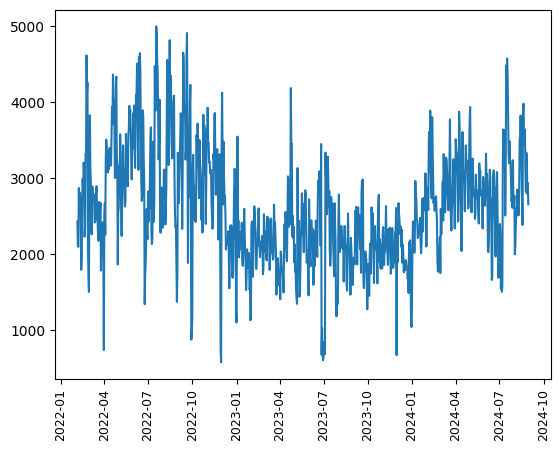

In [74]:
plt.plot(media_final['date'], media_final['ggsearch'])
plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.show()

## ggsave observations

## FACEBOOK OBS

In the plot below, we can see how facebok investment:
* In 2022 and 2023 there was a very delicated decrease but the investment maintain a flat behavior.
* While in 2024, we see something complete different, We can vizualize a more agressive campain.


Some topics to take into account is that there are some zero values which might be consider as outliers





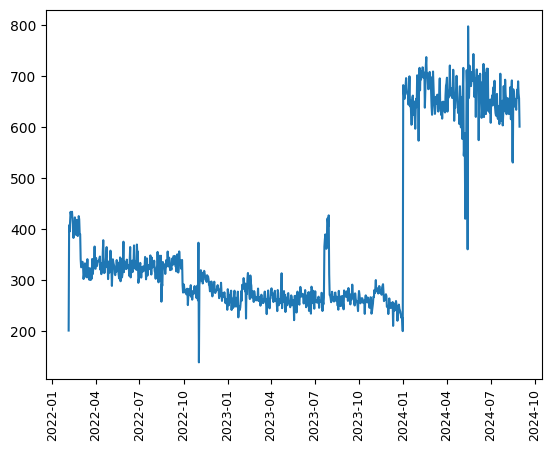

In [75]:
plt.plot(media_final['date'], media_final['facebook'])
plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.show()

## Display OBS

In the plot below, we can see how display investment behavior:
As we can see the display looks similar as a white noise.





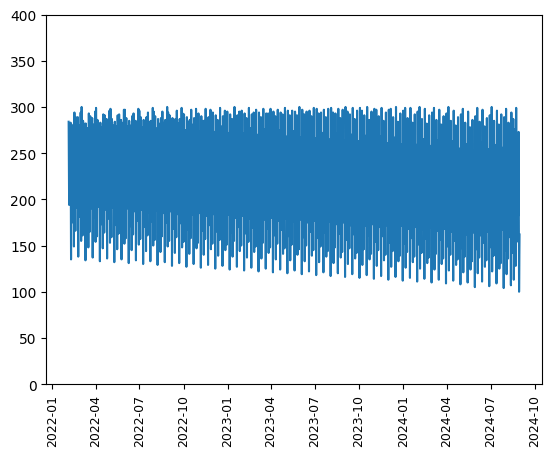

In [76]:
plt.plot(media_final['date'], media_final['display'])
plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.ylim( 0, 400)
plt.show()
## For display what we can see is that it look like irregular. 

## Working with daily data or weekly data

We are going to check how to manipulate the data, compare weekly or daily. 
the principal reasons to do this:

* Check 

In [77]:
media_rn_wkly =media_final.resample("W", on ='date').sum().copy()
media_rn_wkly = media_rn_wkly.reset_index()
media_rn_wkly.head(10)
media_rn_wkly.size

945

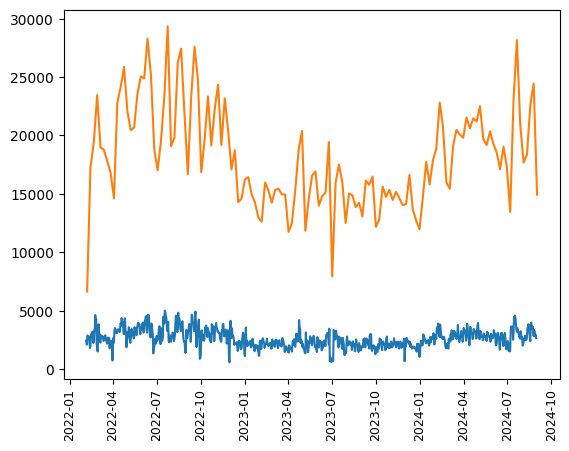

In [78]:
plt.plot(media_final['date'], media_final['ggsearch'])
plt.plot(media_rn_wkly['date'], media_rn_wkly['ggsearch'])

plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.show()

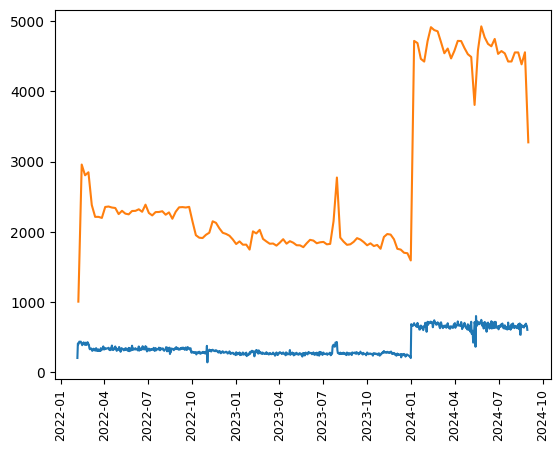

In [79]:
plt.plot(media_final['date'], media_final['facebook'])
plt.plot(media_rn_wkly['date'], media_rn_wkly['facebook'])

plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.show()

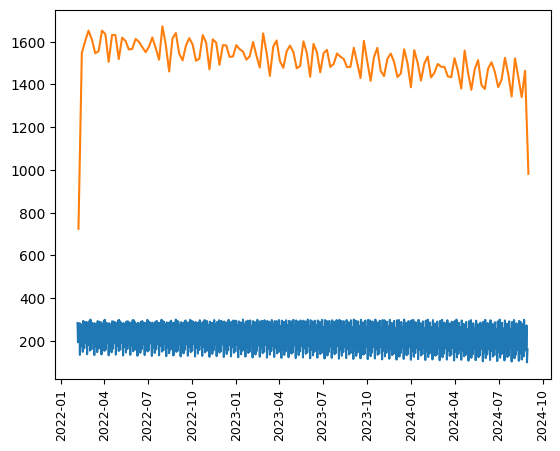

In [80]:
plt.plot(media_final['date'], media_final['display'])
plt.plot(media_rn_wkly['date'], media_rn_wkly['display'])

plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.show()

## Seasonality

In [84]:
agg_list_sum = {}
for name, item in agg_list.items():
    print(item)
    if name in "promotion":
        agg_list_sum[name] = 'sum'
    else:
        agg_list_sum[name] = 'mean'

# del agg_list_sum['date']
agg_list_sum

['sum', 'min', 'mean', 'median', 'max', 'std']
['sum', 'min', 'mean', 'median', 'max', 'std']
['sum', 'min', 'mean', 'median', 'max', 'std']
['sum', 'min', 'mean', 'median', 'max', 'std']


{'ggsearch': 'mean', 'facebook': 'mean', 'display': 'mean', 'promotion': 'sum'}

In [85]:
media_dly_ses = media_final.groupby('day').agg(agg_list_sum).reset_index().copy()
media_dly_ses
media_dly_ses =media_dly_ses.melt(id_vars='day')
media_dly_ses
print(media_dly_ses['day'].unique())


ordenar_dia = [ 'Monday','Tuesday' ,'Wednesday',  'Thursday','Friday', 'Saturday', 'Sunday']
media_dly_ses['day'] =pd.Categorical(media_dly_ses['day'], ordered=True, categories=ordenar_dia)
media_dly_ses.head(10)

['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


,day,variable,value
0,Friday,ggsearch,2514.968757
1,Monday,ggsearch,2841.114223
2,Saturday,ggsearch,2226.020967
3,Sunday,ggsearch,2366.843315
4,Thursday,ggsearch,2694.985395
5,Tuesday,ggsearch,2810.657925
6,Wednesday,ggsearch,2795.414684
7,Friday,facebook,376.296515
8,Monday,facebook,385.610850
9,Saturday,facebook,389.905540


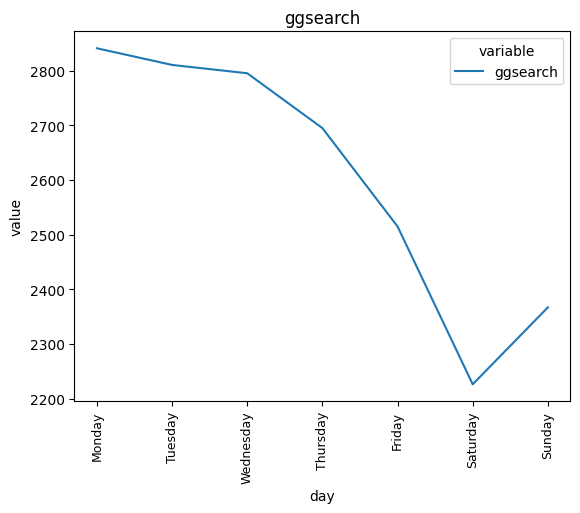

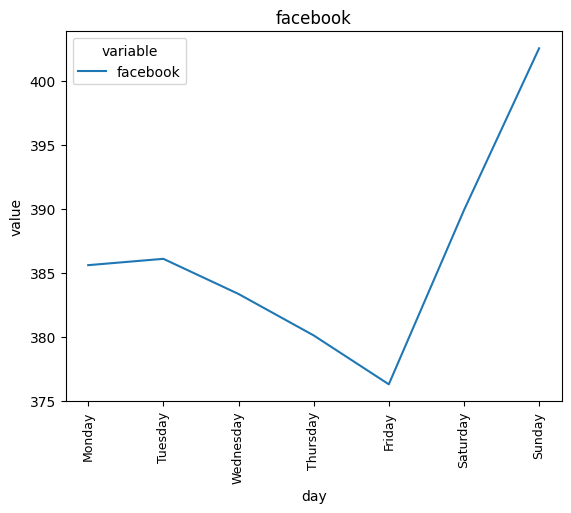

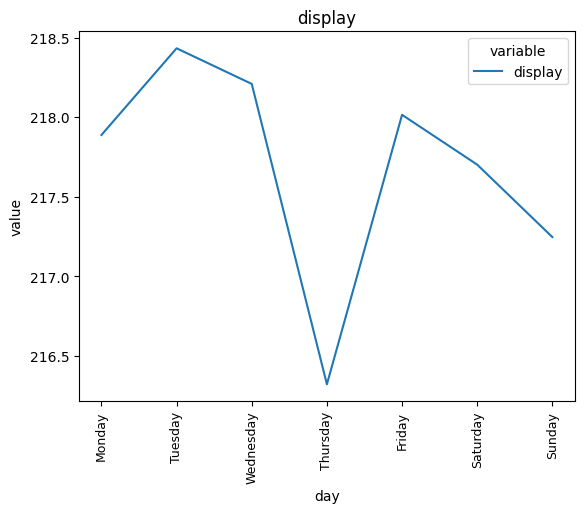

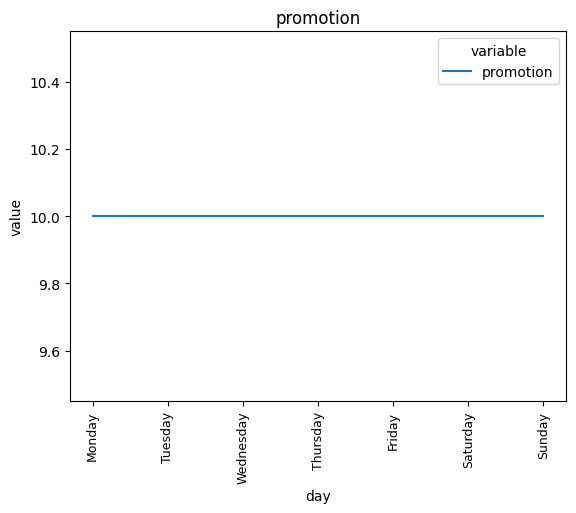

In [86]:

for i in media_dly_ses['variable'].unique():
    sns.lineplot(data=media_dly_ses[media_dly_ses['variable'] == i] , x = 'day', y = 'value', hue= 'variable')
    plt.tick_params(axis='x', rotation=90, labelsize = 9)
    plt.title(i)
    plt.show()




## Daily observations
As we can vizualise there is pattern during the day of the week:

*  ggsearch: Has a better investement at the begging of the week with a tendecy to go down durin the rest of the week having the lower point at saturday
*  facebook: On the other hand, facebook present a higher perfomrance during the weekends.
*  Display: Last, display present a decrease in thursday

With this insight is recommended to try first the model with daily data since theres a seasonal behavior during the week.

## Season Monthly

In [87]:
media_month_ses = media_final.groupby('month').agg(agg_list_sum).reset_index().copy()
media_month_ses
media_month_ses =media_month_ses.melt(id_vars='month')
media_month_ses
print(media_month_ses['month'].unique())

ordenar_month = [ 'January','February' ,'March',  'April','May', 'June', 'July', 'August','September', 'October', 'November', 'December']
media_month_ses['month'] =pd.Categorical(media_month_ses['month'], ordered=True, categories=ordenar_month)
media_month_ses.head(10)

['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']


,month,variable,value
0,April,ggsearch,2906.371296
1,August,ggsearch,2758.295527
2,December,ggsearch,2218.617094
3,February,ggsearch,2529.530700
4,January,ggsearch,2193.991631
5,July,ggsearch,2773.620246
6,June,ggsearch,2679.699434
7,March,ggsearch,2465.581398
8,May,ggsearch,2721.843759
9,November,ggsearch,2487.016125


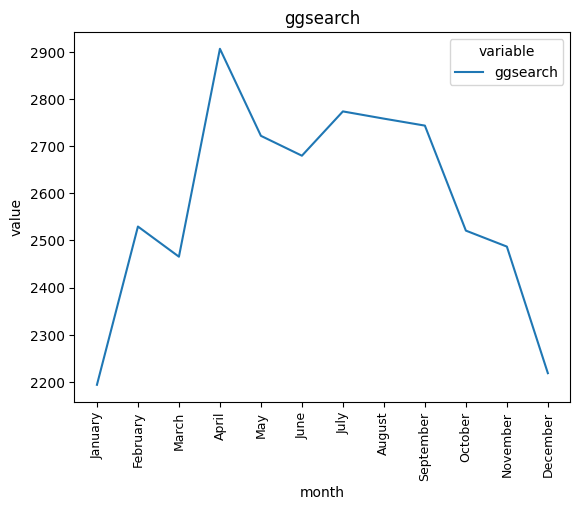

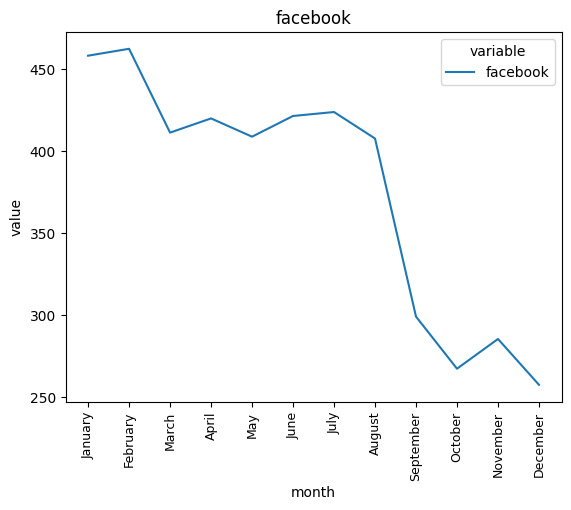

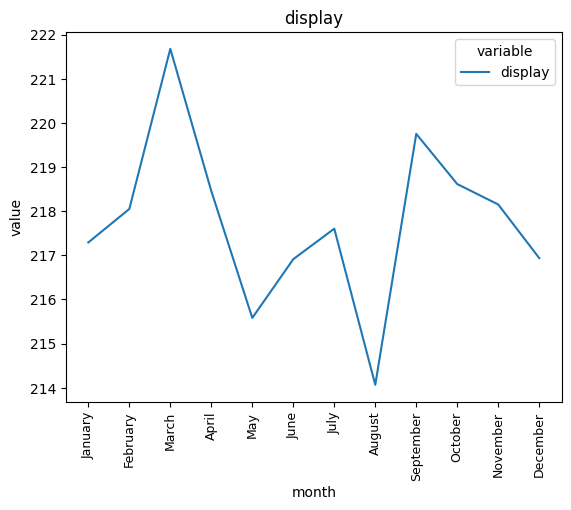

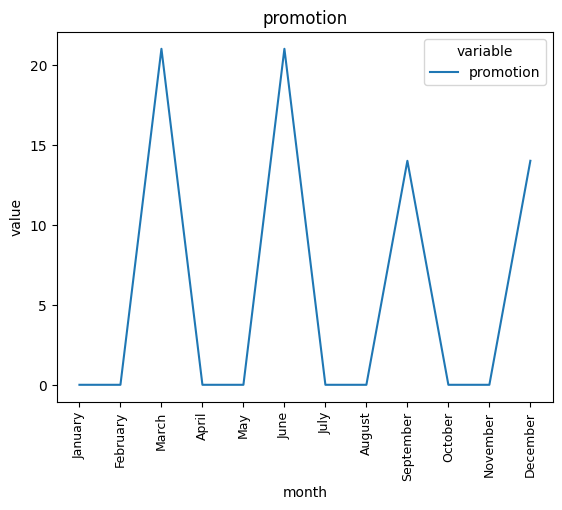

In [88]:

for i in media_month_ses['variable'].unique():
    sns.lineplot(data=media_month_ses[media_month_ses['variable'] == i] , x = 'month', y = 'value', hue= 'variable')
    plt.tick_params(axis='x', rotation=90, labelsize = 9)
    plt.title(i)
    plt.show()




## Montly observations
As we can vizualise there is pattern during the day of the week:

*  ggsearch: Has a better investement at the begging of the week with a tendecy to go down durin the rest of the week having the lower point at saturday
*  facebook: On the other hand, facebook present a higher perfomrance during the weekends.
*  Display: Last, display present a decrease in thursday

With this insight is recommended to try first the model with daily data since theres a seasonal behavior during the week.

# Lead data

lead_dt

In [89]:
lead_dt.head(10)
nombres_lead = {"Lead ID":'id_lead' , "Lead Date":'lead_date',"Qualified Date" :'considere_date',"Purchase Date" :'purcharse_date'}
lead_rn = lead_dt.rename(columns=nombres_lead).copy()
lead_rn.head(10)

for key, item in nombres_lead.items():
    if 'Date' in key:
        lead_rn[item] = pd.to_datetime(lead_rn[item])


In [90]:
lead_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11733 entries, 0 to 11732
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_lead         11733 non-null  int64         
 1   lead_date       11733 non-null  datetime64[ns]
 2   considere_date  1388 non-null   datetime64[ns]
 3   purcharse_date  300 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 366.8 KB


In [91]:
lead_rn[lead_rn['considere_date'].isna()]

,id_lead,lead_date,considere_date,purcharse_date
1388,1389,2022-02-07,NaT,NaT
1389,1390,2022-02-07,NaT,NaT
1390,1391,2022-02-07,NaT,NaT
1391,1392,2022-02-07,NaT,NaT
1392,1393,2022-02-07,NaT,NaT
...,...,...,...,...
11728,11729,2024-09-04,NaT,NaT
11729,11730,2024-09-04,NaT,NaT
11730,11731,2024-09-04,NaT,NaT
11731,11732,2024-09-04,NaT,NaT


In [92]:
lead_var = lead_rn.copy()
lead_var['days_purchase'] = (lead_var['purcharse_date']-lead_var['lead_date']).dt.days
lead_var['days_considered'] = (lead_var['considere_date']-lead_var['lead_date']).dt.days

lead_var['purchase'] = np.where(lead_var['purcharse_date'].isna(), 0, 1)
lead_var = lead_var[lead_var['days_purchase']>0]
lead_var = lead_var[lead_var['days_considered']>=0]

## Leads that purchase

In [93]:
lead_var.head(10)

,id_lead,lead_date,considere_date,purcharse_date,days_purchase,days_considered,purchase
1,2,2022-02-07,2022-02-09,2022-04-14,66.0,2.0,1
2,3,2022-02-09,2022-02-09,2022-09-19,222.0,0.0,1
5,6,2022-02-11,2022-02-14,2022-05-03,81.0,3.0,1
7,8,2022-02-15,2022-02-16,2022-04-21,65.0,1.0,1
8,9,2022-02-17,2022-02-17,2022-05-09,81.0,0.0,1
11,12,2022-02-17,2022-02-18,2022-07-25,158.0,1.0,1
13,14,2022-02-14,2022-02-21,2022-09-06,204.0,7.0,1
14,15,2022-02-16,2022-02-23,2022-06-01,105.0,7.0,1
15,16,2022-02-23,2022-02-23,2022-07-07,134.0,0.0,1
16,17,2022-02-23,2022-02-24,2022-06-08,105.0,1.0,1


In [94]:
lead_compra_dia = lead_var.groupby('lead_date').agg({'days_purchase':'mean','purchase' :'sum' }).reset_index().copy()
lead_compra_dia = lead_compra_dia.rename(columns={'lead_date':'date','days_purchase': 'time_to_purchase', 'purchase': 'purchase_leads_fur'})

lead_compra_dia.head(10)

,date,time_to_purchase,purchase_leads_fur
0,2022-02-07,66.000000,1
1,2022-02-09,222.000000,1
2,2022-02-11,81.000000,1
3,2022-02-14,204.000000,1
4,2022-02-15,65.000000,1
5,2022-02-16,105.000000,1
6,2022-02-17,119.500000,2
7,2022-02-21,126.000000,1
8,2022-02-23,97.666667,3
9,2022-02-28,147.000000,1


In [95]:
lead_compra = lead_var.groupby('purcharse_date').agg({'days_purchase':'mean','purchase' :'sum' }).reset_index().copy()
lead_compra = lead_compra.rename(columns={'purcharse_date':'date','purchase': 'purchase_leads'})

lead_compra.describe()

,date,days_purchase,purchase_leads
count,229,229.000000,229.000000
mean,2023-07-22 12:15:43.231441152,111.005095,1.296943
min,2022-04-14 00:00:00,21.000000,1.000000
25%,2022-12-15 00:00:00,63.000000,1.000000
50%,2023-07-17 00:00:00,95.000000,1.000000
75%,2024-02-29 00:00:00,137.000000,2.000000
max,2024-09-03 00:00:00,836.000000,4.000000
std,NaN,80.544258,0.537244


## Considered leads

In [96]:
lead_considered = lead_var.groupby('considere_date').agg({'days_considered':'mean', 'id_lead': 'count' }).reset_index().copy()
lead_considered = lead_considered.rename(columns={'considere_date':'date','id_lead': 'considered_leads_n'})

lead_considered.head(10)
# lead_considered
# lead_considered.describe()

,date,days_considered,considered_leads_n
0,2022-02-09,1.0,2
1,2022-02-14,3.0,1
2,2022-02-16,1.0,1
3,2022-02-17,0.0,1
4,2022-02-18,1.0,1
5,2022-02-21,7.0,1
6,2022-02-23,3.5,2
7,2022-02-24,1.0,1
8,2022-02-25,4.0,1
9,2022-02-28,0.0,1


## Leads by itself

In [97]:
leads = lead_rn.groupby('lead_date').agg({'id_lead': 'count'}).reset_index().copy()
leads = leads.rename(columns={'lead_date': 'date','id_lead': 'leads_n'})
leads.head(10)
# leads.size

,date,leads_n
0,2022-02-04,1
1,2022-02-05,8
2,2022-02-06,4
3,2022-02-07,21
4,2022-02-08,17
5,2022-02-09,19
6,2022-02-10,18
7,2022-02-11,15
8,2022-02-12,10
9,2022-02-13,8


In [98]:

final_leads = pd.merge(leads,lead_considered  , on ='date' , how = 'left' )\
.merge(lead_compra, on ='date' , how = 'left' )\
.merge(lead_compra_dia,  on ='date' , how = 'left')

In [99]:
# final_leads.head(20)

for columns in final_leads.columns:
    if columns != 'date':
        final_leads[columns] = np.where(final_leads[columns].isna(), 0,final_leads[columns] )

final_leads.head(20)

,date,leads_n,days_considered,considered_leads_n,days_purchase,purchase_leads,time_to_purchase,purchase_leads_fur
0,2022-02-04,1,0.0,0.0,0.0,0.0,0.000000,0.0
1,2022-02-05,8,0.0,0.0,0.0,0.0,0.000000,0.0
2,2022-02-06,4,0.0,0.0,0.0,0.0,0.000000,0.0
3,2022-02-07,21,0.0,0.0,0.0,0.0,66.000000,1.0
4,2022-02-08,17,0.0,0.0,0.0,0.0,0.000000,0.0
5,2022-02-09,19,1.0,2.0,0.0,0.0,222.000000,1.0
6,2022-02-10,18,0.0,0.0,0.0,0.0,0.000000,0.0
7,2022-02-11,15,0.0,0.0,0.0,0.0,81.000000,1.0
8,2022-02-12,10,0.0,0.0,0.0,0.0,0.000000,0.0
9,2022-02-13,8,0.0,0.0,0.0,0.0,0.000000,0.0


## Join data

In [100]:
final_dt = pd.merge(media_final, final_leads, on = 'date', how = 'left')
final_dt.isna().sum()

date                  0
ggsearch              0
facebook              0
display               0
promotion             0
day                   0
month                 0
leads_n               0
days_considered       0
considered_leads_n    0
days_purchase         0
purchase_leads        0
time_to_purchase      0
purchase_leads_fur    0
dtype: int64

In [101]:
final_dt.columns


Index(['date', 'ggsearch', 'facebook', 'display', 'promotion', 'day', 'month',
       'leads_n', 'days_considered', 'considered_leads_n', 'days_purchase',
       'purchase_leads', 'time_to_purchase', 'purchase_leads_fur'],
      dtype='object')

In [102]:
final_dt.to_csv(os.path.join(main_path, "cache/prep_data.csv"))